<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [18]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [19]:
df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [20]:
df.head(10)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
5,5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7
6,6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9
7,7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1
8,8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5
9,9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9


In [21]:
df.columns

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

In [34]:
#basic stats from df
df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  506 non-null    int64   
 1   CRIM        506 non-null    float64 
 2   ZN          506 non-null    float64 
 3   INDUS       506 non-null    float64 
 4   CHAS        506 non-null    float64 
 5   NOX         506 non-null    float64 
 6   RM          506 non-null    float64 
 7   AGE         506 non-null    float64 
 8   DIS         506 non-null    float64 
 9   RAD         506 non-null    float64 
 10  TAX         506 non-null    float64 
 11  PTRATIO     506 non-null    float64 
 12  LSTAT       506 non-null    float64 
 13  MEDV        506 non-null    float64 
 14  Age Group   506 non-null    category
dtypes: category(1), float64(13), int64(1)
memory usage: 56.1 KB


In [23]:
df['MEDV']

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

MEDV - valor medio de las viviendas ocupadas por sus propietarios en miles de dólares


# tasks

# boxplot  of MEDV

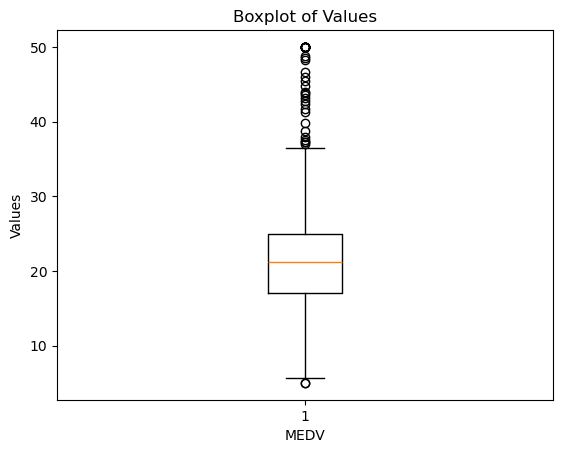

In [26]:
# Create a boxplot
plt.boxplot(df['MEDV'])

# Add labels and title
plt.xlabel('MEDV')
plt.ylabel('Values')
plt.title('Boxplot of Values')

# Show the plot
plt.show()

# Bar chart of Charles river CHAS

Text(0.5, 1.0, 'Number of homes near the Charles River')

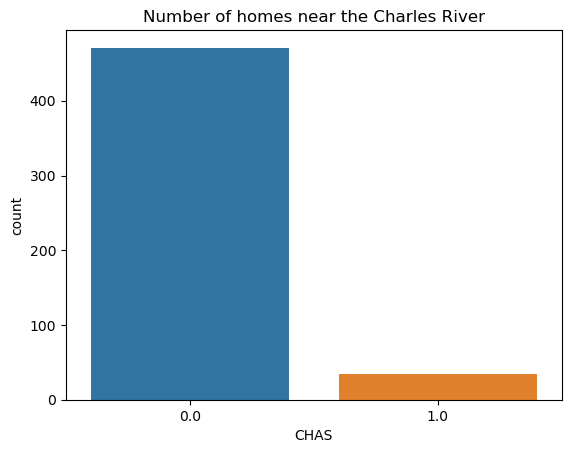

In [27]:
#bar chart with sns
ax2 = sns.countplot(x = 'CHAS', data = boston_df)
ax2.set_title('Number of homes near the Charles River')

# boxplot MEDV vs AGE (35,70)

In [29]:
# Define the bins for discretization
bins = [0, 35, 70, float('inf')]  # Less than 35, between 35 and 70, and more than 70

# Define the labels for each bin
labels = ['Less than 35', 'Between 35 and 70', 'More than 70']

# Discretize the "Age" column
df['Age Group'] = pd.cut(df['AGE'], bins=bins, labels=labels)

# Print the updated DataFrame
print(df)

     Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0             0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1             1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2             2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3             3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4             4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0   
502         502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0   
503         503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0   
504         504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0   
505         505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0   

       TAX  PTRATIO  LSTAT  MEDV       

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


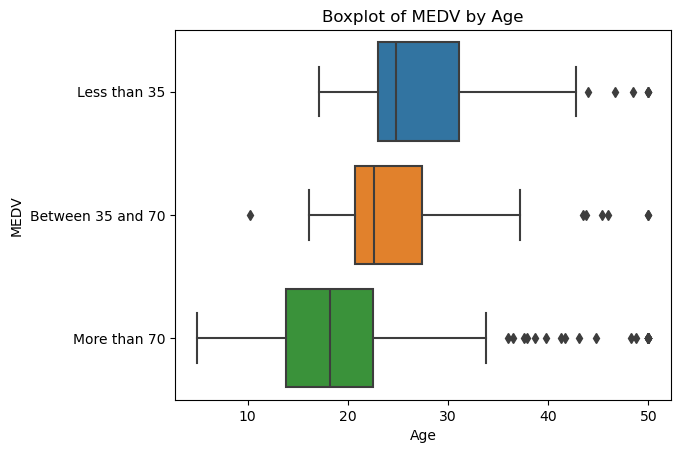

In [32]:
# Create a boxplot using seaborn
sns.boxplot(x='MEDV', y='Age Group', data=df)

# Set the labels and title
plt.xlabel('Age')
plt.ylabel('MEDV')
plt.title('Boxplot of MEDV by Age')

# Show the plot
plt.show()

# NOX vs INDUS 

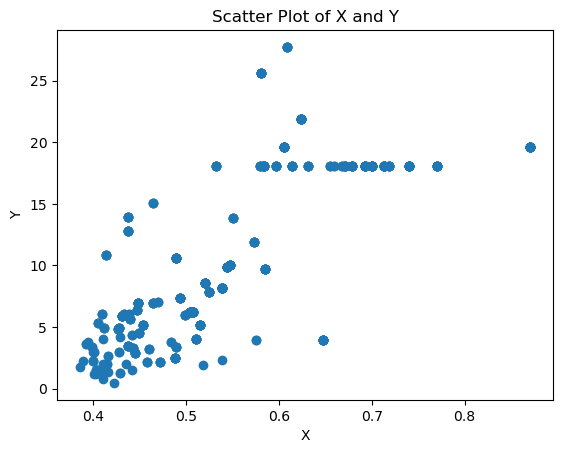

In [33]:
# Create a scatter plot
plt.scatter(df['NOX'], df['INDUS'])

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of X and Y')

# Show the plot
plt.show()

# PTRATIO

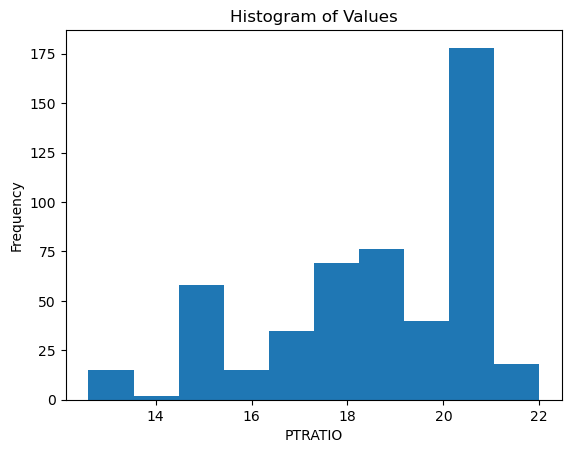

In [35]:
# Create a histogram
plt.hist(df['PTRATIO'], bins=10)

# Add labels and title
plt.xlabel('PTRATIO')
plt.ylabel('Frequency')
plt.title('Histogram of Values')

# Show the plot
plt.show()

# All have next questions have null like hypothesis H0 the no relation between variables

# t student with CHAS and MEDV

In [40]:
df['CHAS'].unique()

array([0., 1.])

In [41]:
df['MEDV'].unique()

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 13.6, 19.6, 15.2, 14.5,
       15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 13.2, 13.1, 13.5, 20. ,
       24.7, 30.8, 34.9, 26.6, 25.3, 21.2, 19.3, 14.4, 19.4, 19.7, 20.5,
       25. , 23.4, 35.4, 31.6, 23.3, 18.7, 16. , 22.2, 33. , 23.5, 22. ,
       17.4, 20.9, 24.2, 22.8, 24.1, 21.4, 20.8, 20.3, 28. , 23.9, 24.8,
       22.5, 23.6, 22.6, 20.6, 28.4, 38.7, 43.8, 33.2, 27.5, 26.5, 18.6,
       20.1, 19.5, 19.8, 18.8, 18.5, 18.3, 19.2, 17.3, 15.7, 16.2, 18. ,
       14.3, 23. , 18.1, 17.1, 13.3, 17.8, 14. , 13.4, 11.8, 13.8, 14.6,
       15.4, 21.5, 15.3, 17. , 41.3, 24.3, 27. , 50. , 22.7, 23.8, 22.3,
       19.1, 29.4, 23.2, 24.6, 29.9, 37.2, 39.8, 37.9, 32.5, 26.4, 29.6,
       32. , 29.8, 37. , 30.5, 36.4, 31.1, 29.1, 33.3, 30.3, 34.6, 32.9,
       42.3, 48.5, 24.4, 22.4, 28.1, 23.7, 26.7, 30.1, 44.8, 37.6, 46.7,
       31.5, 31.7, 41.7, 48.3, 29. , 25.1, 17.6, 24

In [43]:
from scipy import stats

# Split the MEDV values based on the CHAS variable
medv_chas_yes = df[df['CHAS'] == 1]['MEDV']
medv_chas_no = df[df['CHAS'] == 0]['MEDV']

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(medv_chas_yes, medv_chas_no)

# Print the results
print('t-value:', t_statistic)
print('p-value:', p_value)

t-value: 3.996437466090509
p-value: 7.390623170519905e-05


The p-value of 7.39e-05 is significantly smaller than the commonly used significance level of 0.05. This indicates strong evidence against the null hypothesis

The t-value of 3.996 indicates the magnitude of the difference between the mean values of the "MEDV" variable for houses bounded by the Charles River (CHAS=1) and houses not bounded by the river (CHAS=0
                                                                                                                                                                                                    

# MEDV and Age group - ANOVA

In [46]:
from statsmodels.formula.api import ols
lm = ols('MEDV ~ AGE', data = df).fit()
out = sm.stats.anova_lm(lm)
print(out)

             df        sum_sq      mean_sq          F        PR(>F)
AGE         1.0   6069.761065  6069.761065  83.477459  1.569982e-18
Residual  504.0  36646.534350    72.711378        NaN           NaN


In [48]:
# Print the p-values
p_values = out['PR(>F)']
print(p_values)

AGE         1.569982e-18
Residual             NaN
Name: PR(>F), dtype: float64


For the factor "AGE," the p-value is 1.569982e-18, which is extremely small. This indicates strong evidence against the null hypothesis (no effect of "AGE" on house values). Therefore, we can conclude that there is a significant difference in mean house values for different proportions of owner-occupied units built before 1940.

# NOX vs INDUS pearson

In [50]:
# Calculate the Pearson correlation
correlation, p_value = stats.pearsonr(df['NOX'], df['INDUS'])

# Print the correlation coefficient and p-value
print("Pearson correlation coefficient:", correlation)
print("p-value:", p_value)

Pearson correlation coefficient: 0.763651446920915
p-value: 7.913361061241167e-98


The Pearson correlation coefficient between NOX concentrations and the proportion of non-retail business acres (INDUS) per city is 0.763651446920915. This indicates a strong positive correlation between the two variables.

# DIS vd MEDV regression

In [54]:
#build the model
model = sm.OLS(df['DIS'], df['MEDV']).fit()
predisction = model.predict(df['DIS'])

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    DIS   R-squared (uncentered):                   0.732
Model:                            OLS   Adj. R-squared (uncentered):              0.732
Method:                 Least Squares   F-statistic:                              1380.
Date:                Wed, 12 Jun 2024   Prob (F-statistic):                   1.52e-146
Time:                        14:48:16   Log-Likelihood:                         -1127.4
No. Observations:                 506   AIC:                                      2257.
Df Residuals:                     505   BIC:                                      2261.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MEDV           0.1526      0.004     37.149      0.000       0.145       0.161
==============================================================================
Omnibus:                       20.539   Durbin-Watson:                   0.290
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.148
Skew:                           0.169   Prob(JB):                     1.57e-10
Kurtosis:                       4.424   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The t-value associated with the coefficient is 37.149, and the corresponding p-value is 0.000. This indicates strong evidence against the null hypothesis that the coefficient is zero. Therefore, we can conclude that there is a significant relationship between the median home value and the weighted distance to employment centers.